# $$Phase - 2$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
from scipy.integrate import odeint
plt.rcParams["figure.figsize"]=(12,6) ##to increase graph size

## PART A

  ### 1) 
  Given free stream at an angle of $\alpha$,
  u = Vcos$\alpha$ and 
  v = Vsin$\alpha$
  
  also in 2D,
  
   u = $\frac{\partial \phi}{\partial x}$ = $\frac{\partial \psi}{\partial y}$
      
   v = $\frac{\partial \phi}{\partial y}$ = $\frac{-\partial \psi}{\partial x}$
   
   where $\phi$ is potential function and $\psi$ is stream function
   
   so,
   
   u = Vcos$\alpha$ = $\frac{\partial \phi}{\partial x}$ 
   
   
   
   integrating,
   
   $\phi$ = Vcos$(\alpha)$ $x$ + $f(y)$
   
   
   
   partial derivative w.r.t y
   
   $\frac{\partial \phi}{\partial y}$ =$f'(y)$ = Vsin$\alpha$ = v
   
   $f'(y)$ = Vsin$\alpha$ 
   
   
   
   integrating
   
   $f(y) = Vysin\alpha + c$
   
   
   
   
   plugging this back in we get
   
   $\phi$ = $Vcos(\alpha)$ $x$ + $Vsin(\alpha)$ $y$ + $c1$
   
   
   
   
   Similarly, we get 
   
   $\psi$ = $Vcos(\alpha)$ $y$ - $Vsin(\alpha)$ $x$ + $c2$
   
   
   Complex potential is given by 
   
   $\Phi = \phi + i \psi$
   
   $\Phi= [Vcos(\alpha) x + Vsin(\alpha) y + c1] + i[Vcos(\alpha) y - Vsin(\alpha) x + c2] $ 

### 2)

In [2]:
a,b = np.mgrid[-10:10:30j, -10:10:30j]

In [3]:
alpha = np.pi/6
V = 10

In [4]:
u = V*np.cos(alpha)
v = V*np.sin(alpha)

Text(0.5, 1.0, 'Velocity Field of Free Stream at and Angle Of Attack Alpha')

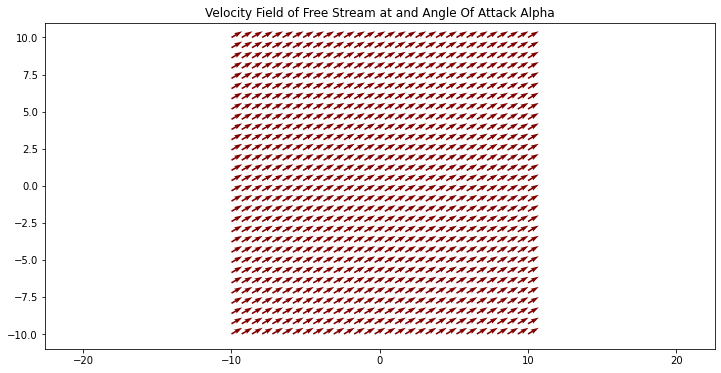

In [5]:
plt.clf
plt.quiver(a,b,u,v, color= "maroon")
plt.axis('equal')
plt.title('Velocity Field of Free Stream at and Angle Of Attack Alpha')

### 3)

Text(0.5, 1.0, 'potenial lines')

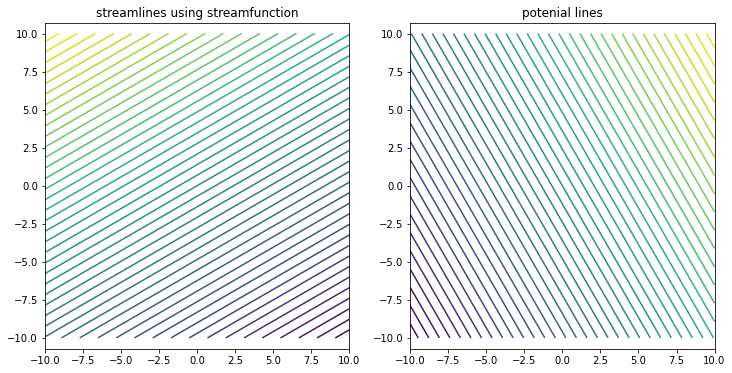

In [6]:
psi_fs = V*np.cos(alpha)*b - V*np.sin(alpha)*a
plt.subplot(1,2,1)
plt.contour(a, b, psi_fs, levels = 50)
plt.axis('equal')  
plt.title('streamlines using streamfunction')

phi_fs = V*np.cos(alpha)*a + V*np.sin(alpha)*b
plt.subplot(1,2,2)
plt.contour(a, b, phi_fs, levels = 50)
plt.axis('equal')
plt.title('potenial lines')

## PART B

### 1) A single source and sink

##### i)
complex potential is given by

$\Phi = \frac{q}{2\pi}ln(z-z_0) =[ \frac{q}{4\pi}ln((x-x_0)^2 + (y-y_0)^2)] + i[\frac{q}{2\pi}tan^{-1}(\frac{y-y_0}{x-x_0})] = \phi + i \psi$

so, 

$\frac{d\Phi}{dz} = \frac{q}{2\pi(z-z0)} = \frac{q(x-x_0)}{2\pi((x-x_0)^2+(y-y_0)^2)} - i\frac{q(y-y_0)}{2\pi((x-x_0)^2+(y-y_0)^2)}= u-iv$
##### ii)

In [7]:
def vel_single_source_or_sink(x,y, x0, y0, q): ## defined a velocity function of a source with parameters x, y coordinates and
                                               ## strength q placed at (x0,y0)
    r = np.sqrt((x-x0)**2+ (y-y0)**2)
    u = (q/(2*np.pi))*((x-x0)/((x-x0)**2 + (y-y0)**2))
    v = (q/(2*np.pi))*((y-y0)/((x-x0)**2 + (y-y0)**2))
    u[r <1.7]=0
    v[r <1.7]=0
    return np.array([u,v])

src_us , src_vs = vel_single_source_or_sink(a,b, 4,2 ,1) 
sink_us, sink_vs = vel_single_source_or_sink(a,b,3,-5,-1)

Text(0.5, 1.0, 'velocity field of a single sink at (3,-5)')

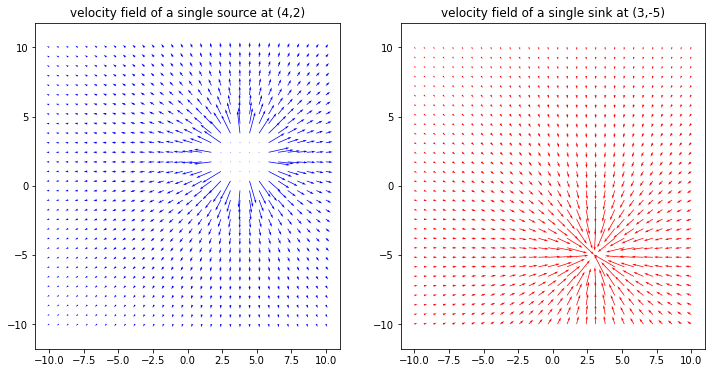

In [8]:
plt.clf
plt.subplot(1,2,1)
plt.quiver(a,b, src_us, src_vs, color="blue")
plt.axis('equal')
plt.title('velocity field of a single source at (4,2)')
plt.subplot(1,2,2)

plt.quiver(a,b, sink_us, sink_vs, color="red")
plt.axis('equal')
plt.title('velocity field of a single sink at (3,-5)')


##### iii)

In [9]:
#initial conditions
x0_src, y0_src = 4, 2
x0_sink, y0_sink = 3,-5
q=1
psi_ssrc, psi_ssink = np.mgrid[-10:10:30j,-10:10:30j ]
phi_ssrc, phi_ssink = np.mgrid[-10:10:30j,-10:10:30j ]
 


In [10]:

for i in range(len(a[0])):
    for j in range(len(b[0])):

        psi_ssink[i][j] = (-q/(2*np.pi))*(math.atan((b[i][j]-y0_sink)/(a[i][j]-x0_sink)))
        psi_ssrc[i][j] = (q/(2*np.pi))*(math.atan((b[i][j]-y0_src)/(a[i][j]-x0_src)))

Text(0.5, 1.0, 'streamlines using streamfunction for sink at (3,-5)')

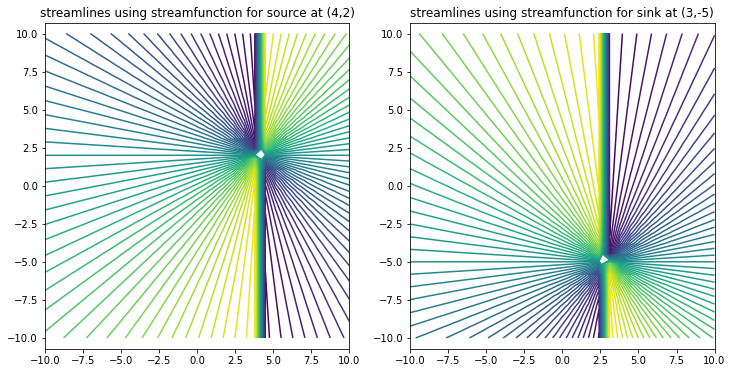

In [11]:
plt.subplot(1,2,1)
plt.contour(a, b, psi_ssrc, levels = 50)
plt.axis('equal')  
plt.title('streamlines using streamfunction for source at (4,2)')


plt.subplot(1,2,2)
plt.contour(a, b, psi_ssink, levels = 50)
plt.axis('equal')  
plt.title('streamlines using streamfunction for sink at (3,-5)')

In [12]:
for i in range(30):
    for j in range(30):
        phi_ssink[i][j] = (-q/(4*np.pi))*(math.log((a[i][j] - x0_sink)**2 + (b[i][j]- y0_sink)**2))
        phi_ssrc[i][j] = (q/(4*np.pi))*(math.log((a[i][j] - x0_src)**2 + (b[i][j]- y0_src)**2))
        

Text(0.5, 1.0, 'potential lines using potential function for sink at (3,-5)')

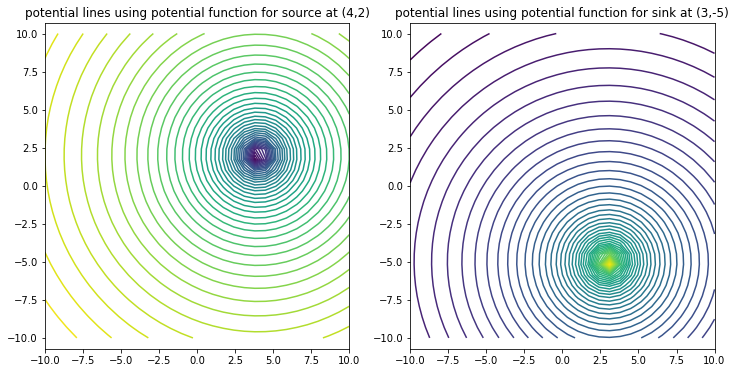

In [13]:
plt.subplot(1,2,1)
plt.contour(a, b, phi_ssrc, levels = 50)
plt.axis('equal')  
plt.title('potential lines using potential function for source at (4,2)')


plt.subplot(1,2,2)
plt.contour(a, b, phi_ssink, levels = 50)
plt.axis('equal')  
plt.title('potential lines using potential function for sink at (3,-5)')

#### 2) A Doublet
##### i)
complex potential is given by

$\Phi = \frac{\mu}{2\pi(z-z_0)} = \frac{\mu((x-x_0) -i (y-y_0))}{2\pi((x-x_0)^2+(y-y_0)^2} = \phi + i\psi$

so,

$\frac{d\Phi}{dz} = u -iv = [\frac{-\mu((x-x_0)^2 - (y-y_0)^2)}{2\pi((x-x_0)^2+(y-y_0)^2)^2}] + i[\frac{\mu(x-x_0)(y-y_0)}{\pi((x-x_0)^2+(y-y_0)^2)^2}]$

##### ii)

In [14]:
def vel_doublet(x,y,x0,y0,mu):
    r = np.sqrt((x-x0)**2+ (y-y0)**2)
    u = (-mu*((x-x0)**2-(y-y0)**2))/(2*np.pi*(r**4))
    v = (-mu*(x-x0)*(y-y0))/(np.pi*(r**4))
    u[r<np.pi] = 0
    v[r<np.pi] = 0
    return np.array([u,v])

In [15]:
doublet_us, doublet_vs = vel_doublet(a,b, 0,0,1)


Text(0.5, 1.0, 'velocity field of a doublet at (0,0)')

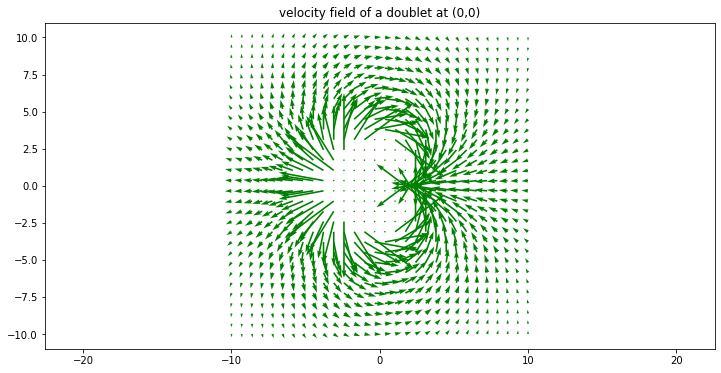

In [16]:
plt.clf
plt.quiver(a,b, doublet_us, doublet_vs, color= "green")
plt.axis('equal')
plt.title("velocity field of a doublet at (0,0)")

In [17]:
mu = 1
x0 = 0
y0 = 0
r = np.sqrt(a**2 +b**2)
phi_doublet = (mu*(a-x0))/(2*np.pi*(r**2))
psi_doublet = (-mu*(b-y0))/(2*np.pi*(r**2))

Text(0.5, 1.0, 'streamlines using streamfunction of a doublet at (0,0)')

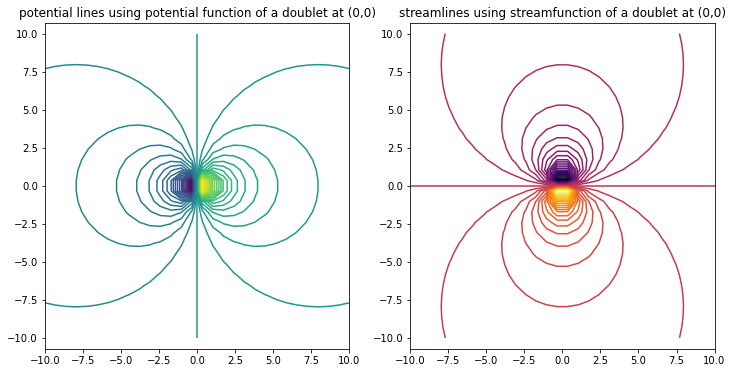

In [18]:
plt.subplot(1,2,1)
plt.contour(a,b,phi_doublet,levels = 50)
plt.axis('equal')
plt.title("potential lines using potential function of a doublet at (0,0)")
plt.subplot(1,2,2)
plt.contour(a,b, psi_doublet, levels= 50, cmap="inferno")
plt.axis('equal')
plt.title("streamlines using streamfunction of a doublet at (0,0)")

#### 3) A point vortex
##### i)
complex potential is given by

$\Phi = i\frac{\Gamma}{2\pi}ln(z-z_0) $

$ = i\frac{\Gamma}{2\pi}ln(|z-z_0|) -\frac{\Gamma}{2\pi}tan^{-1}(\frac{y-y_0}{x-x_0})$

$ = i\frac{\Gamma}{4\pi}ln((x-x_0)^2 + (y-y_0)^2) -\frac{\Gamma}{2\pi}tan^{-1}(\frac{y-y_0}{x-x_0})$ 

$  = \phi + i\psi$

so,

$\frac{d\Phi}{dz} = i \frac{\Gamma}{2\pi(z-z_0)} = [\frac{\Gamma(y-y_0)}{2\pi((x-x_0)^2+(y-y_0)^2)}]+i[\frac{\Gamma(x-x_0)}{2\pi((x-x_0)^2+(y-y_0)^2)}] = u - iv$

##### ii)

In [19]:
def vel_point_vortex(x,y,x0,y0,gamma):
    r = np.sqrt((x-x0)**2+ (y-y0)**2)
    u = gamma*(y-y0)/(2*np.pi*(r**2))
    v = -gamma*(x-x0)/(2*np.pi*(r**2))
    u[r<1.5]=0
    v[r<1.5]=0
    return np.array([u,v])

In [20]:
vortex_us, vortex_vs = vel_point_vortex(a,b,1,2,1)


Text(0.5, 1.0, 'velocity field of a point vortex @ (1,2)')

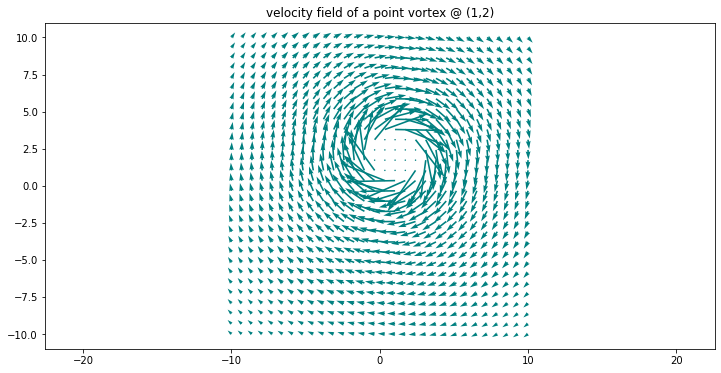

In [21]:
plt.clf
plt.quiver(a,b,vortex_us,vortex_vs, color ="teal")
plt.axis("equal")
plt.title("velocity field of a point vortex @ (1,2)")

##### iii)

In [22]:
gamma = 1
x0 = 1
y0 = 2
r = np.sqrt(a**2 +b**2)
phi_vortex ,psi_vortex = np.mgrid[-10:10:30j, -10:10:30j]


In [23]:
for i in range(30):
    for j in range(30):
        phi_vortex[i][j] = (-gamma/2*np.pi)*(math.atan((b[i][j]-y0)/(a[i][j]-x0)))
        psi_vortex[i][j] = (gamma/4*np.pi)*(math.log((a[i][j]-x0)**2+(b[i][j]-y0)**2))

Text(0.5, 1.0, 'streamlines using streamfunction of a point vortex at (1,2)')

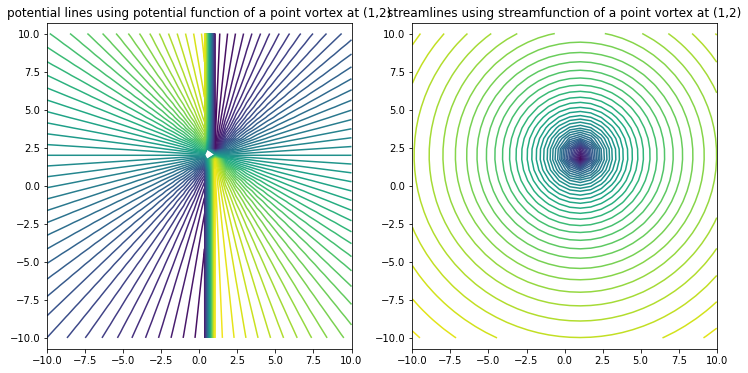

In [24]:
plt.subplot(1,2,1)
plt.contour(a,b,phi_vortex,levels = 50)
plt.axis('equal')
plt.title("potential lines using potential function of a point vortex at (1,2)")
plt.subplot(1,2,2)
plt.contour(a,b, psi_vortex, levels= 50)
plt.axis('equal')
plt.title("streamlines using streamfunction of a point vortex at (1,2)")

## PART C

$\Phi_{point source} = \frac{q}{2\pi}ln(z-z_0)$

$\Phi_{free stream} = Uz$


$\Phi = \Phi_{free stream} +\Phi_{point source} $

$= Uz +\frac{q}{2\pi}ln(z-z_0)$

$=[Ux + \frac{q}{4\pi}ln((x-x_0)^2 + (y-y_0)^2)] + i[ Uy +\frac{q}{2\pi}tan^{-1}(\frac{y-y_0}{x-x_0})]$

$= \phi + i\psi$

so,

$\frac{d\Phi}{dz} = U +\frac{q}{2\pi(z-z_0)}$

$ = U +\frac{q(x-x_0)}{2\pi((x-x_0)^2+(y-y_0)^2)} - i\frac{q(y-y_0)}{2\pi((x-x_0)^2+(y-y_0)^2)}$ 

$ = u -iv$

In [25]:
def vel_rankine_halfbody(x,y,x0,y0,q,U):
    r = (x-x0)**2 +(y-y0)**2
    u = U + (q/(2*np.pi))*((x-x0)/((x-x0)**2 + (y-y0)**2))
    v = (q/(2*np.pi))*((y-y0)/((x-x0)**2 + (y-y0)**2))
    u[r <0.01]=0
    v[r <0.01]=0
    return np.array([u,v])

In [26]:
a_0 , b_0 = np.mgrid[-1:0.5:30j, -0.5:0.5:30j]
a0 , b0 = np.mgrid[-1:0.5:300j, -0.5:0.5:300j]
rankine_hb_us, rankine_hb_vs = vel_rankine_halfbody(a_0,b_0,-0.5,0,1,1)

Text(0.5, 1.0, 'velocity field of rankine halfboady with source at (-0.5,0)')

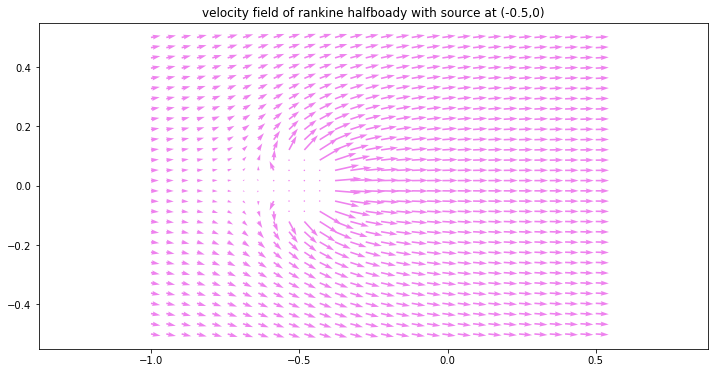

In [27]:

plt.quiver(a_0,b_0, rankine_hb_us, rankine_hb_vs, color="violet")
plt.axis('equal')
plt.title('velocity field of rankine halfboady with source at (-0.5,0)')

In [28]:
#initial conditions
x0_src_rhb, y0_src_rhb = -0.5, 0
q=1
U =1
psi_rhb, phi_rhb = np.mgrid[-1:0.5:300j,-0.5:0.5:300j ]

for i in range(len(a0[0])):
    for j in range(len(b0[0])):
        psi_rhb[i][j] = U*b0[i][j] +(q/(2*np.pi))*(np.angle((a0[i][j]-x0_src_rhb)+1j*(b0[i][j]-y0_src_rhb)))
    #  psi_rhb[i][j] = U*b0[i][j] +(q/(2*np.pi))*(math.atan((b0[i][j]-y0_src_rhb)/(a0[i][j]-x0_src_rhb)))
        phi_rhb[i][j] = U*a0[i][j] +(q/(4*np.pi))*(math.log((a0[i][j] - x0_src_rhb)**2 + (b0[i][j]- y0_src_rhb)**2))

Text(0.5, 1.0, 'streamlines using streamfunction of a rankine halfbody')

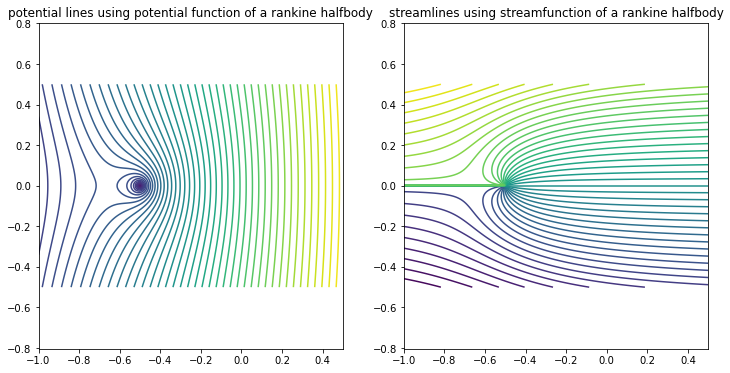

In [29]:
plt.subplot(1,2,1)
plt.contour(a0,b0,phi_rhb,levels = 50)
plt.axis('equal')
plt.title("potential lines using potential function of a rankine halfbody")
plt.subplot(1,2,2)
plt.contour(a0,b0, psi_rhb, levels= 50)
plt.axis('equal')
plt.title("streamlines using streamfunction of a rankine halfbody")

$\Phi = \Phi_{free stream} +\Phi_{point source} +\Phi_{point sink} $

$= Uz +\frac{q}{2\pi}ln(z-z_1) +\frac{-q}{2\pi}ln(z-z_2)$

$=[Ux + \frac{q}{4\pi}ln((x-x_1)^2 + (y-y_1)^2)] -\frac{q}{4\pi}ln((x-x_2)^2 + (y-y_2)^2)] + i[ Uy +\frac{q}{2\pi}tan^{-1}(\frac{y-y_1}{x-x_1})-\frac{q}{2\pi}tan^{-1}(\frac{y-y_2}{x-x_2})]$

$= \phi + i\psi$

so,

$\frac{d\Phi}{dz} = U +\frac{q}{2\pi(z-z_1)} -\frac{q}{2\pi(z-z_2)}$


$ = U +\frac{q(x-x_1)}{2\pi((x-x_1)^2+(y-y_1)^2)}-\frac{q(x-x_2)}{2\pi((x-x_2)^2+(y-y_2)^2)} - i[\frac{q(y-y_1)}{2\pi((x-x_1)^2+(y-y_1)^2)}-\frac{q(y-y_2)}{2\pi((x-x_2)^2+(y-y_2)^2)}]$ 

$ = u -iv$

In [30]:
def vel_rankine_oval(x,y,x1,y1,x2,y2,q1,q2,U):
    r1 = (x-x1)**2 +(y-y1)**2
    r2 = (x-x2)**2 +(y-y2)**2
    u = U + (q1/(2*np.pi))*((x-x1)/((x-x1)**2 + (y-y1)**2))+(q2/(2*np.pi))*((x-x2)/((x-x2)**2 + (y-y2)**2))
    v = (q1/(2*np.pi))*((y-y1)/((x-x1)**2 + (y-y1)**2)) +(q2/(2*np.pi))*((y-y2)/((x-x2)**2 + (y-y2)**2))
    u[r1 <0.01] ,u[r2 <0.01]=0,0
    v[r1 <0.01] ,v[r2 <0.01]=0,0
    return np.array([u,v])

In [31]:
a1 , b1 = np.mgrid[-1:1:300j, -0.5:0.5:300j]
a_1, b_1= np.mgrid[-1:1:30j, -0.5:0.5:30j]
rankine_oval_us, rankine_oval_vs = vel_rankine_oval(a_1,b_1,-0.5,0,0.5,0,1,-1,1)

In [32]:
#initial conditions
x1_src_ro, y1_src_ro = -0.5, 0
x2_sink_ro, y2_sink_ro= 0.5, 0
q1, q2=1,-1
U =1
psi_ro, phi_ro = np.mgrid[-1:1:300j,-0.5:0.5:300j ]

for i in range(len(a1[0])):
    for j in range(len(b1[0])):
        psi_ro[i][j] = U*b1[i][j] +(q1/(2*np.pi))*(np.angle(1j*(b1[i][j]-y1_src_ro)+(a1[i][j]-x1_src_ro)))+(q2/(2*np.pi))*(np.angle(1j*(b1[i][j]-y2_sink_ro)+(a1[i][j]-x2_sink_ro)))
        
       # psi_ro[i][j] = U*b1[i][j] +(q1/(2*np.pi))*(np.arctan((b1[i][j]-y1_src_ro)/(a1[i][j]-x1_src_ro)))+(q2/(2*np.pi))*(np.arctan((b1[i][j]-y2_sink_ro)/(a1[i][j]-x2_sink_ro)))
        phi_ro[i][j] = U*a1[i][j] +(q1/(4*np.pi))*(math.log((a1[i][j] - x1_src_ro)**2 + (b1[i][j]- y1_src_ro)**2))+(q2/(4*np.pi))*(math.log((a1[i][j] - x2_sink_ro)**2 + (b1[i][j]- y2_sink_ro)**2))

Text(0.5, 1.0, 'velocity field + streamlines + potential lines of rankine oval with source at (-0.5,0) and sink at (0.5,0)')

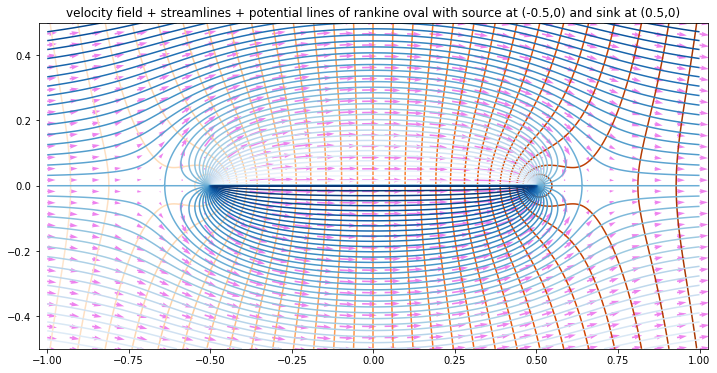

In [33]:

plt.contour(a1,b1,phi_ro,levels = 40, cmap='Oranges')
plt.contour(a1,b1,psi_ro,levels = 40, cmap='Blues')
plt.quiver(a_1,b_1, rankine_oval_us, rankine_oval_vs, color="violet")

plt.axis('equal')
plt.title('velocity field + streamlines + potential lines of rankine oval with source at (-0.5,0) and sink at (0.5,0)')

$p=p_0 + \frac{1}{2}\rho (V_0^2-V^2) =p_0 + \frac{1}{2}\rho(u_0^2-u^2 + v_0^2 -v^2)   $

In [34]:
p , p0  = np.mgrid[1000:1000:30j, 1000:1000:30j]
u0 ,v0 = np.mgrid[U:U:30j, 0:0:30j]
rho = 1000
p  = p0 + 0.5*rho*(u0**2 - rankine_oval_us**2 + v0**2 -rankine_oval_vs**2)

(-1.0, 1.0, -0.5, 0.5)

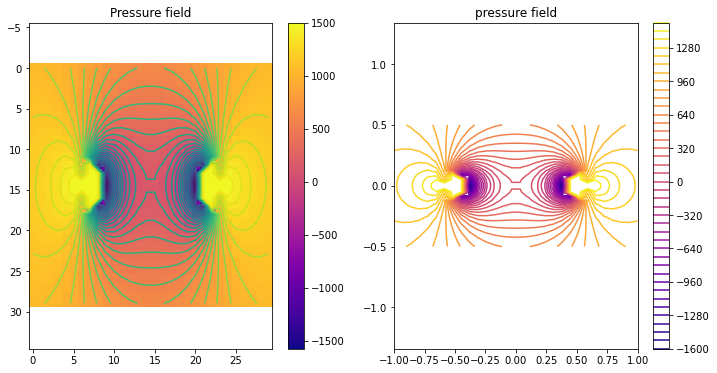

In [43]:
plt.subplot(1,2,1)
plt.imshow(p.T, cmap='plasma');
plt.colorbar();
plt.contour(p.T, levels=50)
plt.title("Pressure field")
plt.axis("equal")
plt.subplot(1,2,2)
plt.contour(a_1,b_1,p, levels=50, cmap="plasma")
plt.colorbar();
plt.title("pressure field")
plt.axis("equal")

In [ ]:
V = np.sqrt(rankine_oval_us**2 +rankine_oval_vs**2)

(-1.0, 1.0, -0.5, 0.5)

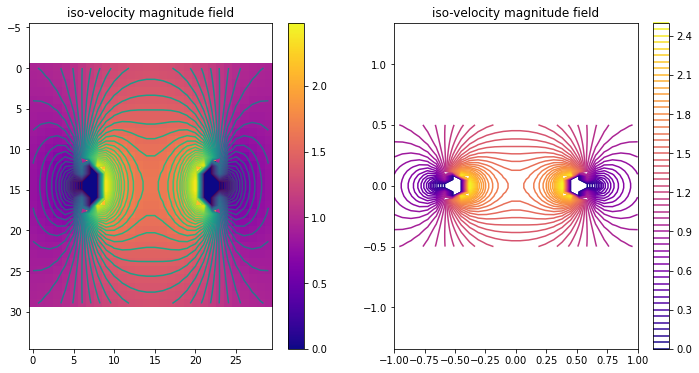

In [45]:
plt.subplot(1,2,1)
plt.imshow(V.T, cmap='plasma');
plt.colorbar();
plt.contour(V.T, levels=50)
plt.axis("equal")
plt.title("iso-velocity magnitude field")
plt.subplot(1,2,2)
plt.contour(a_1,b_1,V, levels=50, cmap="plasma")
plt.colorbar();
plt.title("iso-velocity magnitude field")
plt.axis("equal")

velocity is min (zero) at stagnation points and max (2U) is at topmost point of oval.


In [38]:
x1_src_ro, y1_src_ro = -0.5, 0
x2_sink_ro, y2_sink_ro= 0.5, 0
q1, q2=0.5,-1.5
U =1
psi_ro1, phi_ro1 = np.mgrid[-1:1:300j,-0.5:0.5:300j ]

for i in range(len(a1[0])):
    for j in range(len(b1[0])):
        psi_ro1[i][j] = U*b1[i][j] +(q1/(2*np.pi))*(np.angle(1j*(b1[i][j]-y1_src_ro)+(a1[i][j]-x1_src_ro)))+(q2/(2*np.pi))*(np.angle(1j*(b1[i][j]-y2_sink_ro)+(a1[i][j]-x2_sink_ro)))
        phi_ro1[i][j] = U*a1[i][j] +(q1/(4*np.pi))*(math.log((a1[i][j] - x1_src_ro)**2 + (b1[i][j]- y1_src_ro)**2))+(q2/(4*np.pi))*(math.log((a1[i][j] - x2_sink_ro)**2 + (b1[i][j]- y2_sink_ro)**2))

Text(0.5, 1.0, 'streamlines + potential lines of rankine oval with source at (-0.5,0) and sink at (0.5,0) of given source strengths')

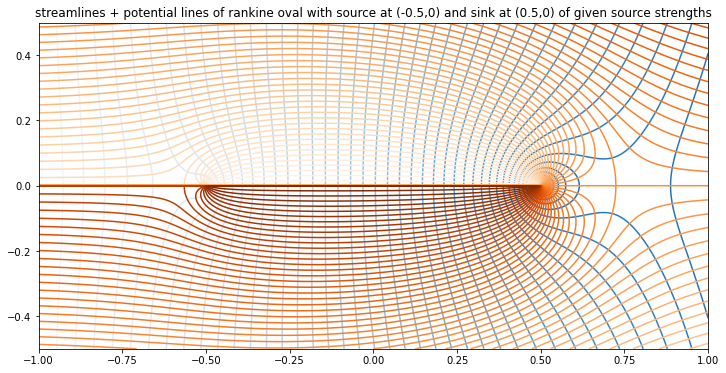

In [47]:

plt.contour(a1,b1,phi_ro1,levels = 60, cmap="Blues")
plt.contour(a1,b1,psi_ro1,levels = 60, cmap='Oranges')
plt.title('streamlines + potential lines of rankine oval with source at (-0.5,0) and sink at (0.5,0) of given source strengths')

In [40]:
x1_src_ro, y1_src_ro = -0.5, 0
x2_sink_ro, y2_sink_ro= 0.5, 0
q1, q2=1.5,-0.5
U =1
psi_ro2, phi_ro2 = np.mgrid[-1:1:300j,-0.5:0.5:300j ]

for i in range(len(a1[0])):
    for j in range(len(b1[0])):
        psi_ro2[i][j] = U*b1[i][j] +(q1/(2*np.pi))*(np.angle(1j*(b1[i][j]-y1_src_ro)+(a1[i][j]-x1_src_ro)))+(q2/(2*np.pi))*(np.angle(1j*(b1[i][j]-y2_sink_ro)+(a1[i][j]-x2_sink_ro)))
        phi_ro2[i][j] = U*a1[i][j] +(q1/(4*np.pi))*(math.log((a1[i][j] - x1_src_ro)**2 + (b1[i][j]- y1_src_ro)**2))+(q2/(4*np.pi))*(math.log((a1[i][j] - x2_sink_ro)**2 + (b1[i][j]- y2_sink_ro)**2))

Text(0.5, 1.0, 'streamlines + potential lines of rankine oval with source at (-0.5,0) and sink at (0.5,0) of given source strengths')

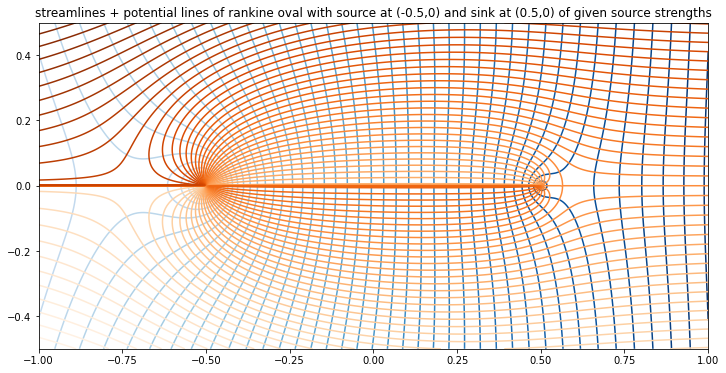

In [46]:

plt.contour(a1,b1,phi_ro2,levels = 60, cmap="Blues")
plt.contour(a1,b1,psi_ro2,levels = 60, cmap='Oranges')
plt.title('streamlines + potential lines of rankine oval with source at (-0.5,0) and sink at (0.5,0) of given source strengths')